<a href="https://colab.research.google.com/github/bongaaaaA/Machine-learning-project/blob/main/heart_ML_by_Pytorch%20deep%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import torch
from torch import nn
from torch.functional import F

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv('/content/heart.csv')

In [69]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [70]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [72]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [73]:
data.shape

(918, 12)

In [74]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

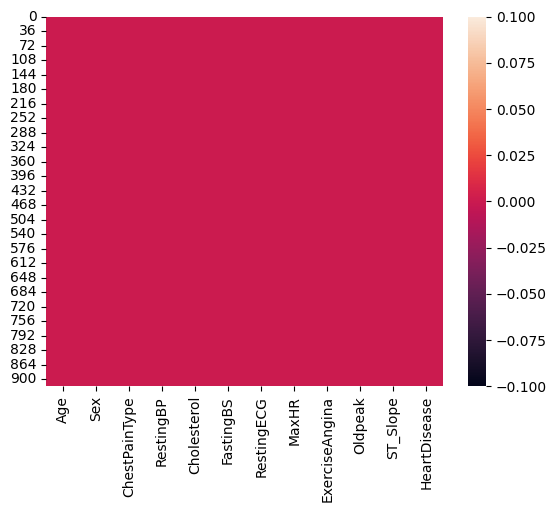

In [75]:
sns.heatmap(data.isnull())

In [76]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

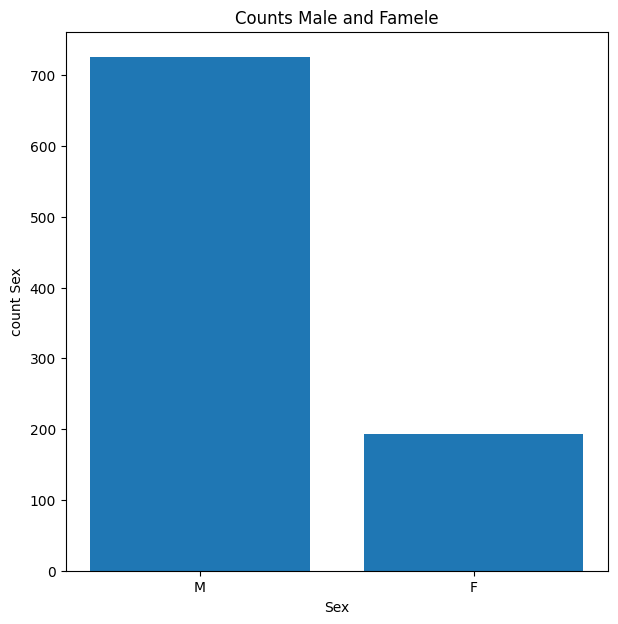

In [77]:
plt.figure(figsize=(7,7))
plt.title("Counts Male and Famele")
plt.bar(data['Sex'].value_counts().index, data['Sex'].value_counts())
plt.xlabel('Sex')
plt.ylabel('count Sex')
plt.show()

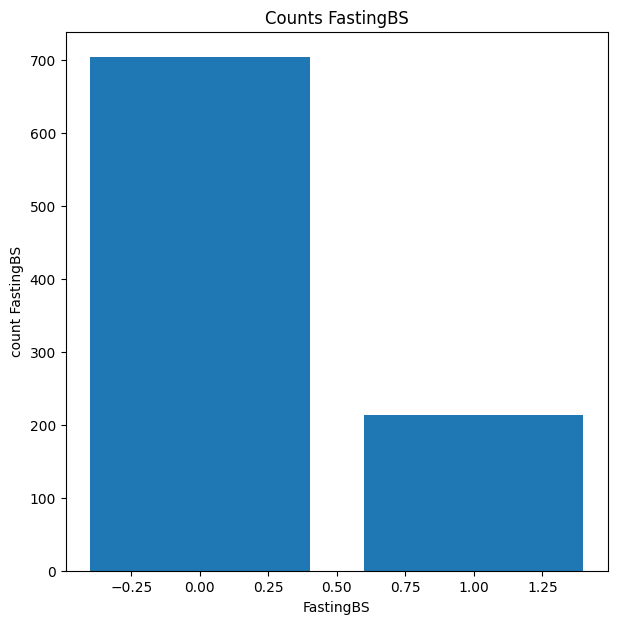

In [78]:
plt.figure(figsize=(7,7))
plt.title("Counts FastingBS")
plt.bar(data['FastingBS'].value_counts().index, data['FastingBS'].value_counts())
plt.xlabel('FastingBS')
plt.ylabel('count FastingBS')
plt.show()

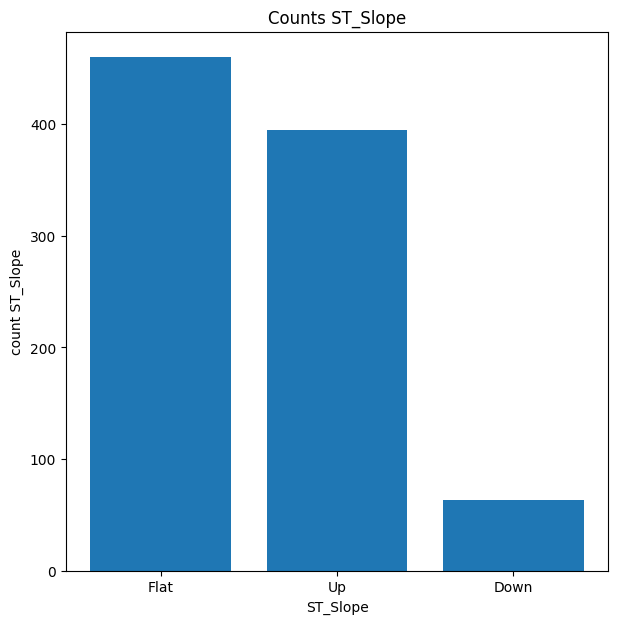

In [79]:
plt.figure(figsize=(7,7))
plt.title("Counts ST_Slope")
plt.bar(data['ST_Slope'].value_counts().index, data['ST_Slope'].value_counts())
plt.xlabel('ST_Slope')
plt.ylabel('count ST_Slope')
plt.show()

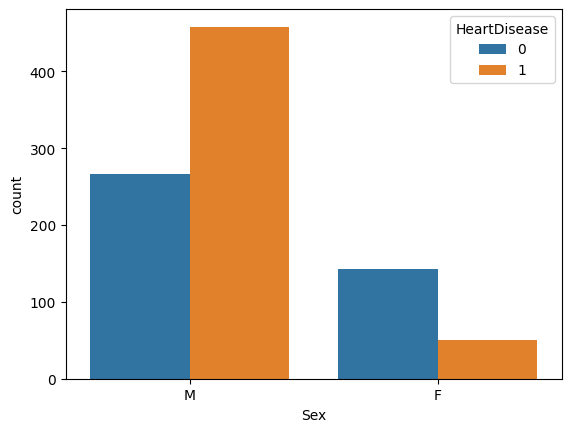

In [80]:
sns.countplot(x='Sex', data=data, hue='HeartDisease')
plt.show()

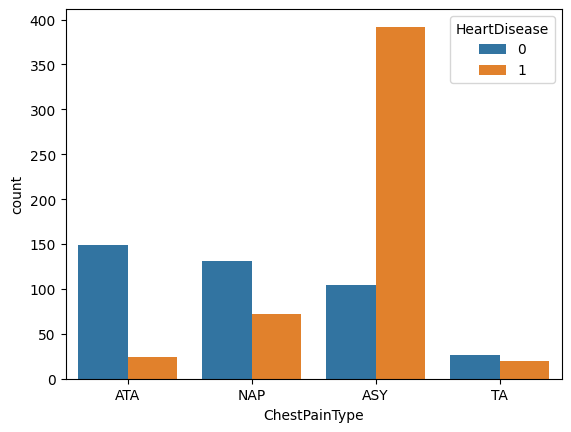

In [81]:
sns.countplot(x='ChestPainType', data=data, hue='HeartDisease')
plt.show()

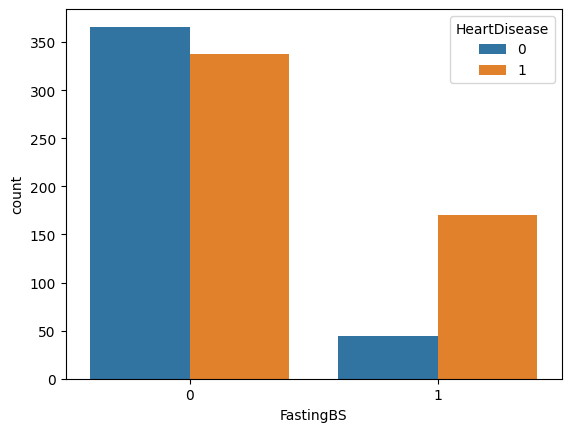

In [82]:
sns.countplot(x='FastingBS', data=data, hue='HeartDisease')
plt.show()

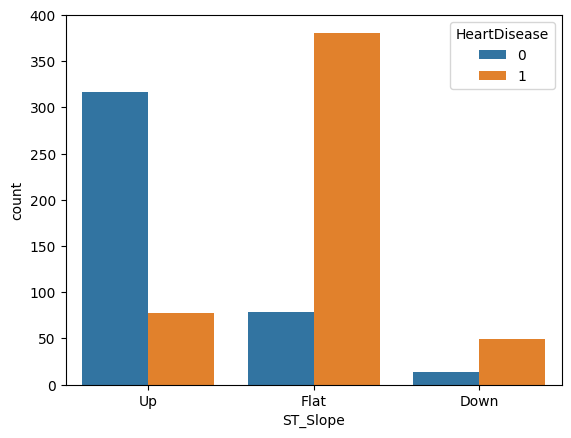

In [83]:
sns.countplot(x='ST_Slope', data=data, hue='HeartDisease')
plt.show()

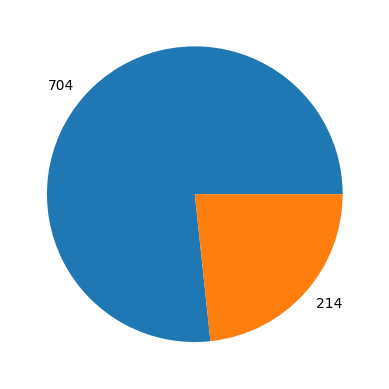

In [84]:
plt.pie(data['FastingBS'].value_counts(), data=data, labels=data['FastingBS'].value_counts())
plt.show()

In [85]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [86]:
S = {"M":0, "F":1}

data['Sex'] = data['Sex'].map(S)

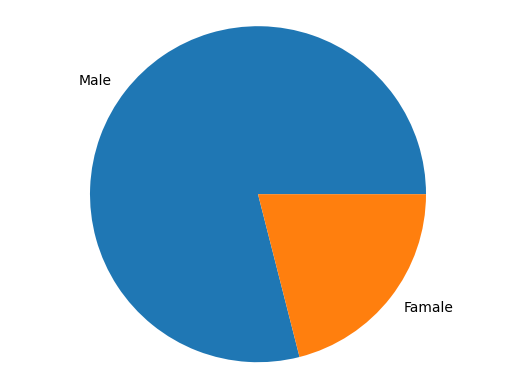

In [87]:
plt.pie(data['Sex'].value_counts(), data=data, labels=["Male", "Famale"])
plt.axis('equal')
plt.show()


In [88]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [89]:
ChestPain = {"ASY":0, "NAP":1, "ATA":2, "TA":3}

data['ChestPainType'] = data['ChestPainType'].map(ChestPain)



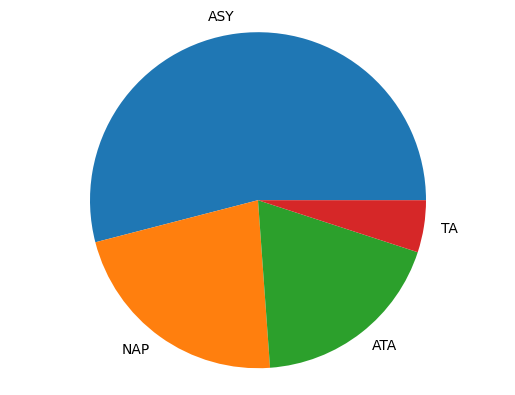

In [90]:
plt.pie(data['ChestPainType'].value_counts(), data=data, labels=["ASY", "NAP","ATA", "TA"])
plt.axis('equal')
plt.show()

In [91]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [92]:
RestingEGG = {"Normal":0, "LVH":1, "ST":2}

data['RestingECG'] = data['RestingECG'].map(RestingEGG)

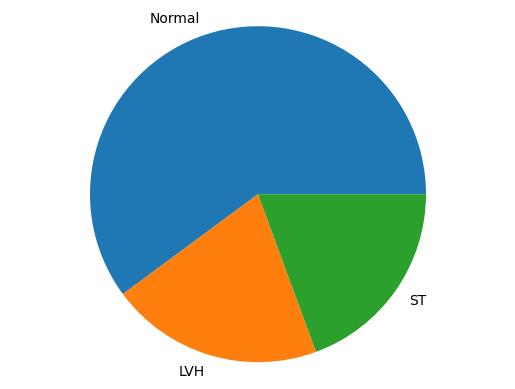

In [93]:
plt.pie(data['RestingECG'].value_counts(), data=data,  labels=["Normal","LVH","ST"])
plt.axis('equal')
plt.show()

In [94]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,N,0.0,Up,0
1,49,1,1,160,180,0,0,156,N,1.0,Flat,1
2,37,0,2,130,283,0,2,98,N,0.0,Up,0
3,48,1,0,138,214,0,0,108,Y,1.5,Flat,1
4,54,0,1,150,195,0,0,122,N,0.0,Up,0
5,39,0,1,120,339,0,0,170,N,0.0,Up,0
6,45,1,2,130,237,0,0,170,N,0.0,Up,0
7,54,0,2,110,208,0,0,142,N,0.0,Up,0
8,37,0,0,140,207,0,0,130,Y,1.5,Flat,1
9,48,1,2,120,284,0,0,120,N,0.0,Up,0


In [95]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [96]:
ExerciseAngina = {"N":0, "Y":1}

data['ExerciseAngina'] = data['ExerciseAngina'].map(ExerciseAngina)

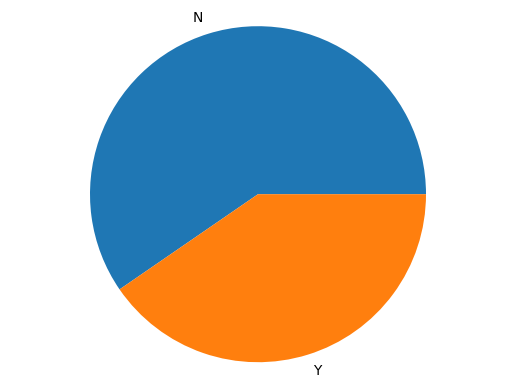

In [97]:
plt.pie(data['ExerciseAngina'].value_counts(), data=data,  labels=["N","Y"])
plt.axis('equal')
plt.show()

In [98]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [99]:
ST_Slope = {"Flat":0, "Up":1, "Down":2}

data['ST_Slope'] = data['ST_Slope'].map(ST_Slope)

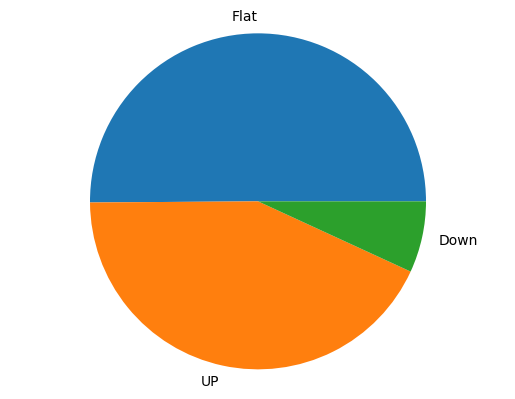

In [100]:
plt.pie(data['ST_Slope'].value_counts(), data=data,  labels=["Flat","UP","Down"])
plt.axis('equal')
plt.show()

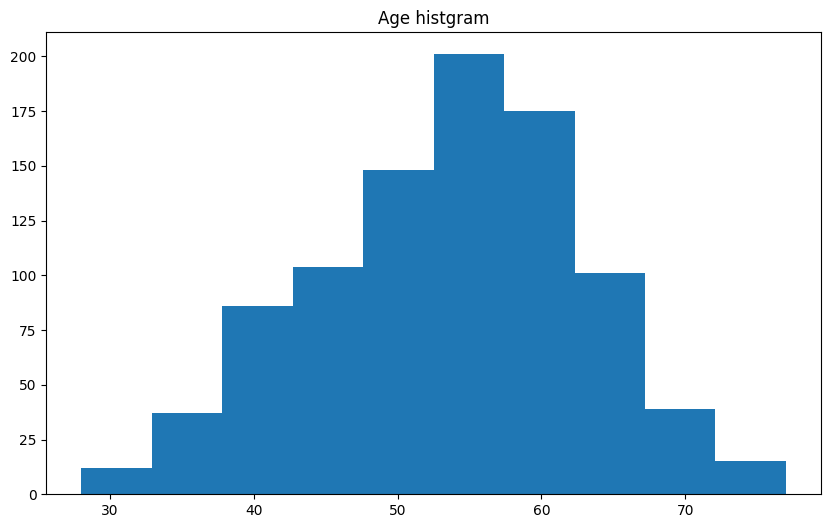

In [101]:
plt.figure(figsize=(10,6))
plt.title('Age histgram')
plt.hist(x='Age', data=data)
plt.show()

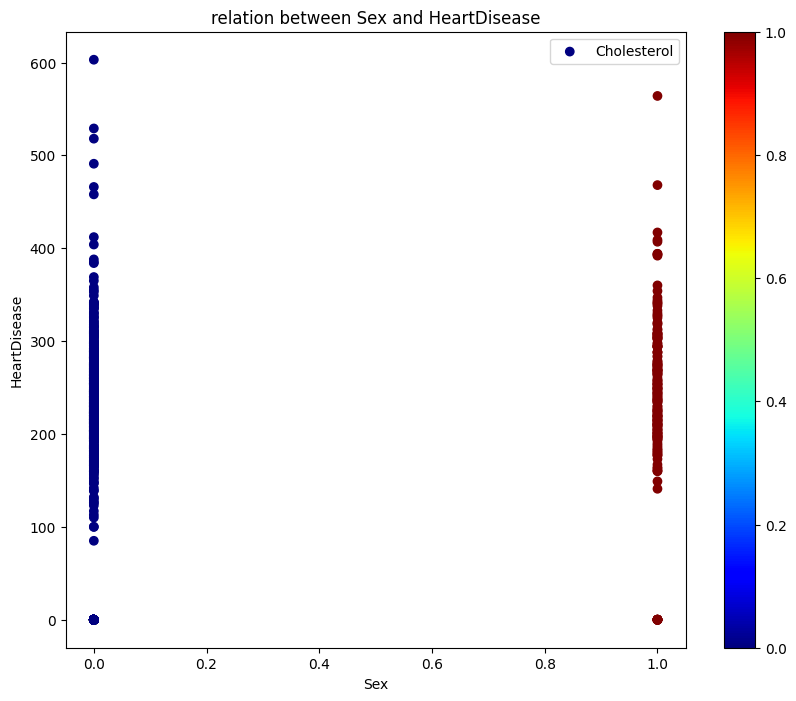

In [102]:
plt.figure(figsize=(10,8))
plt.title("relation between Sex and HeartDisease")
ps = plt.scatter(x='Sex', y='Cholesterol',cmap=plt.get_cmap('jet'),c='Sex', data=data)
plt.colorbar(ps)
plt.xlabel("Sex")
plt.ylabel("HeartDisease")
plt.legend()
plt.show()

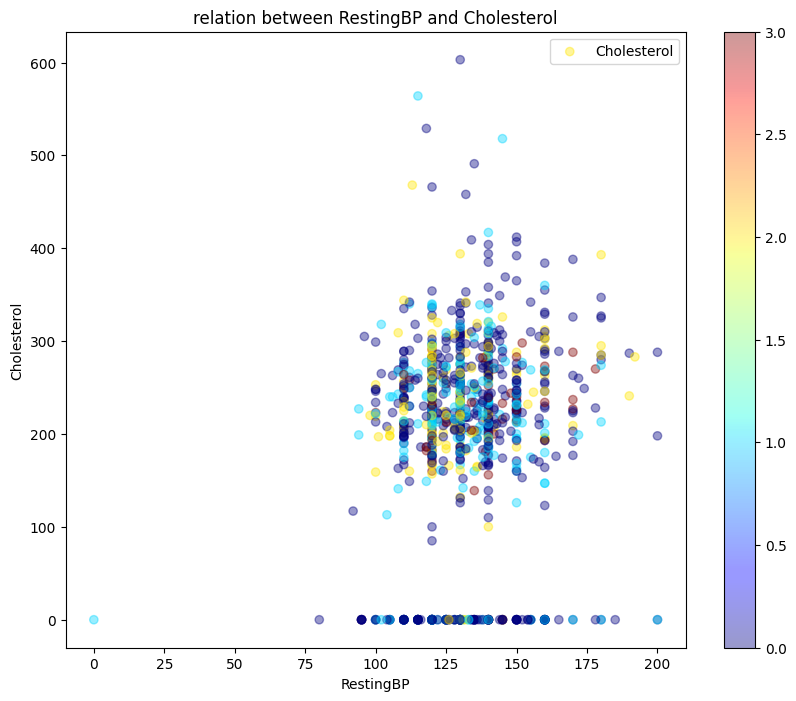

In [103]:
plt.figure(figsize=(10,8))
plt.title("relation between RestingBP and Cholesterol")
px = plt.scatter(x='RestingBP', y='Cholesterol',c='ChestPainType',cmap=plt.get_cmap('jet'),alpha=0.4, data=data)
plt.colorbar(px)
plt.xlabel("RestingBP")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

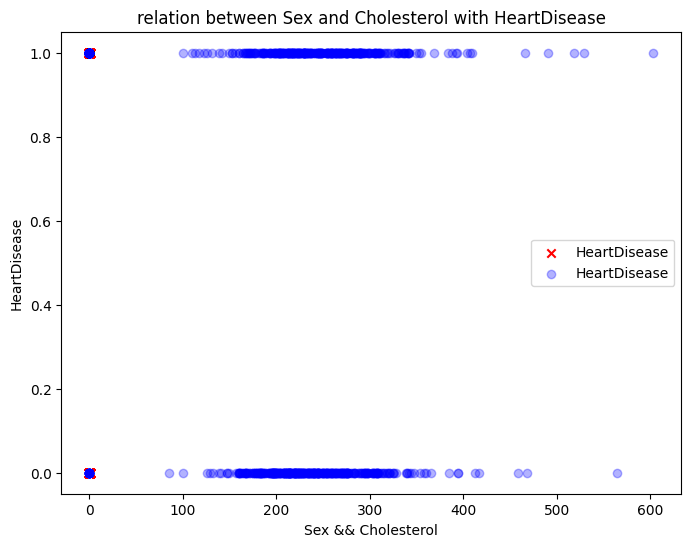

In [104]:
plt.figure(figsize=(8,6))
plt.title("relation between Sex and Cholesterol with HeartDisease")
plt.scatter(x='Sex', y='HeartDisease',c='r', marker="x",data=data)
plt.scatter(x='Cholesterol', y='HeartDisease',c='b',alpha=0.3,data=data)
plt.xlabel("Sex && Cholesterol")
plt.ylabel("HeartDisease")
plt.legend()
plt.show()

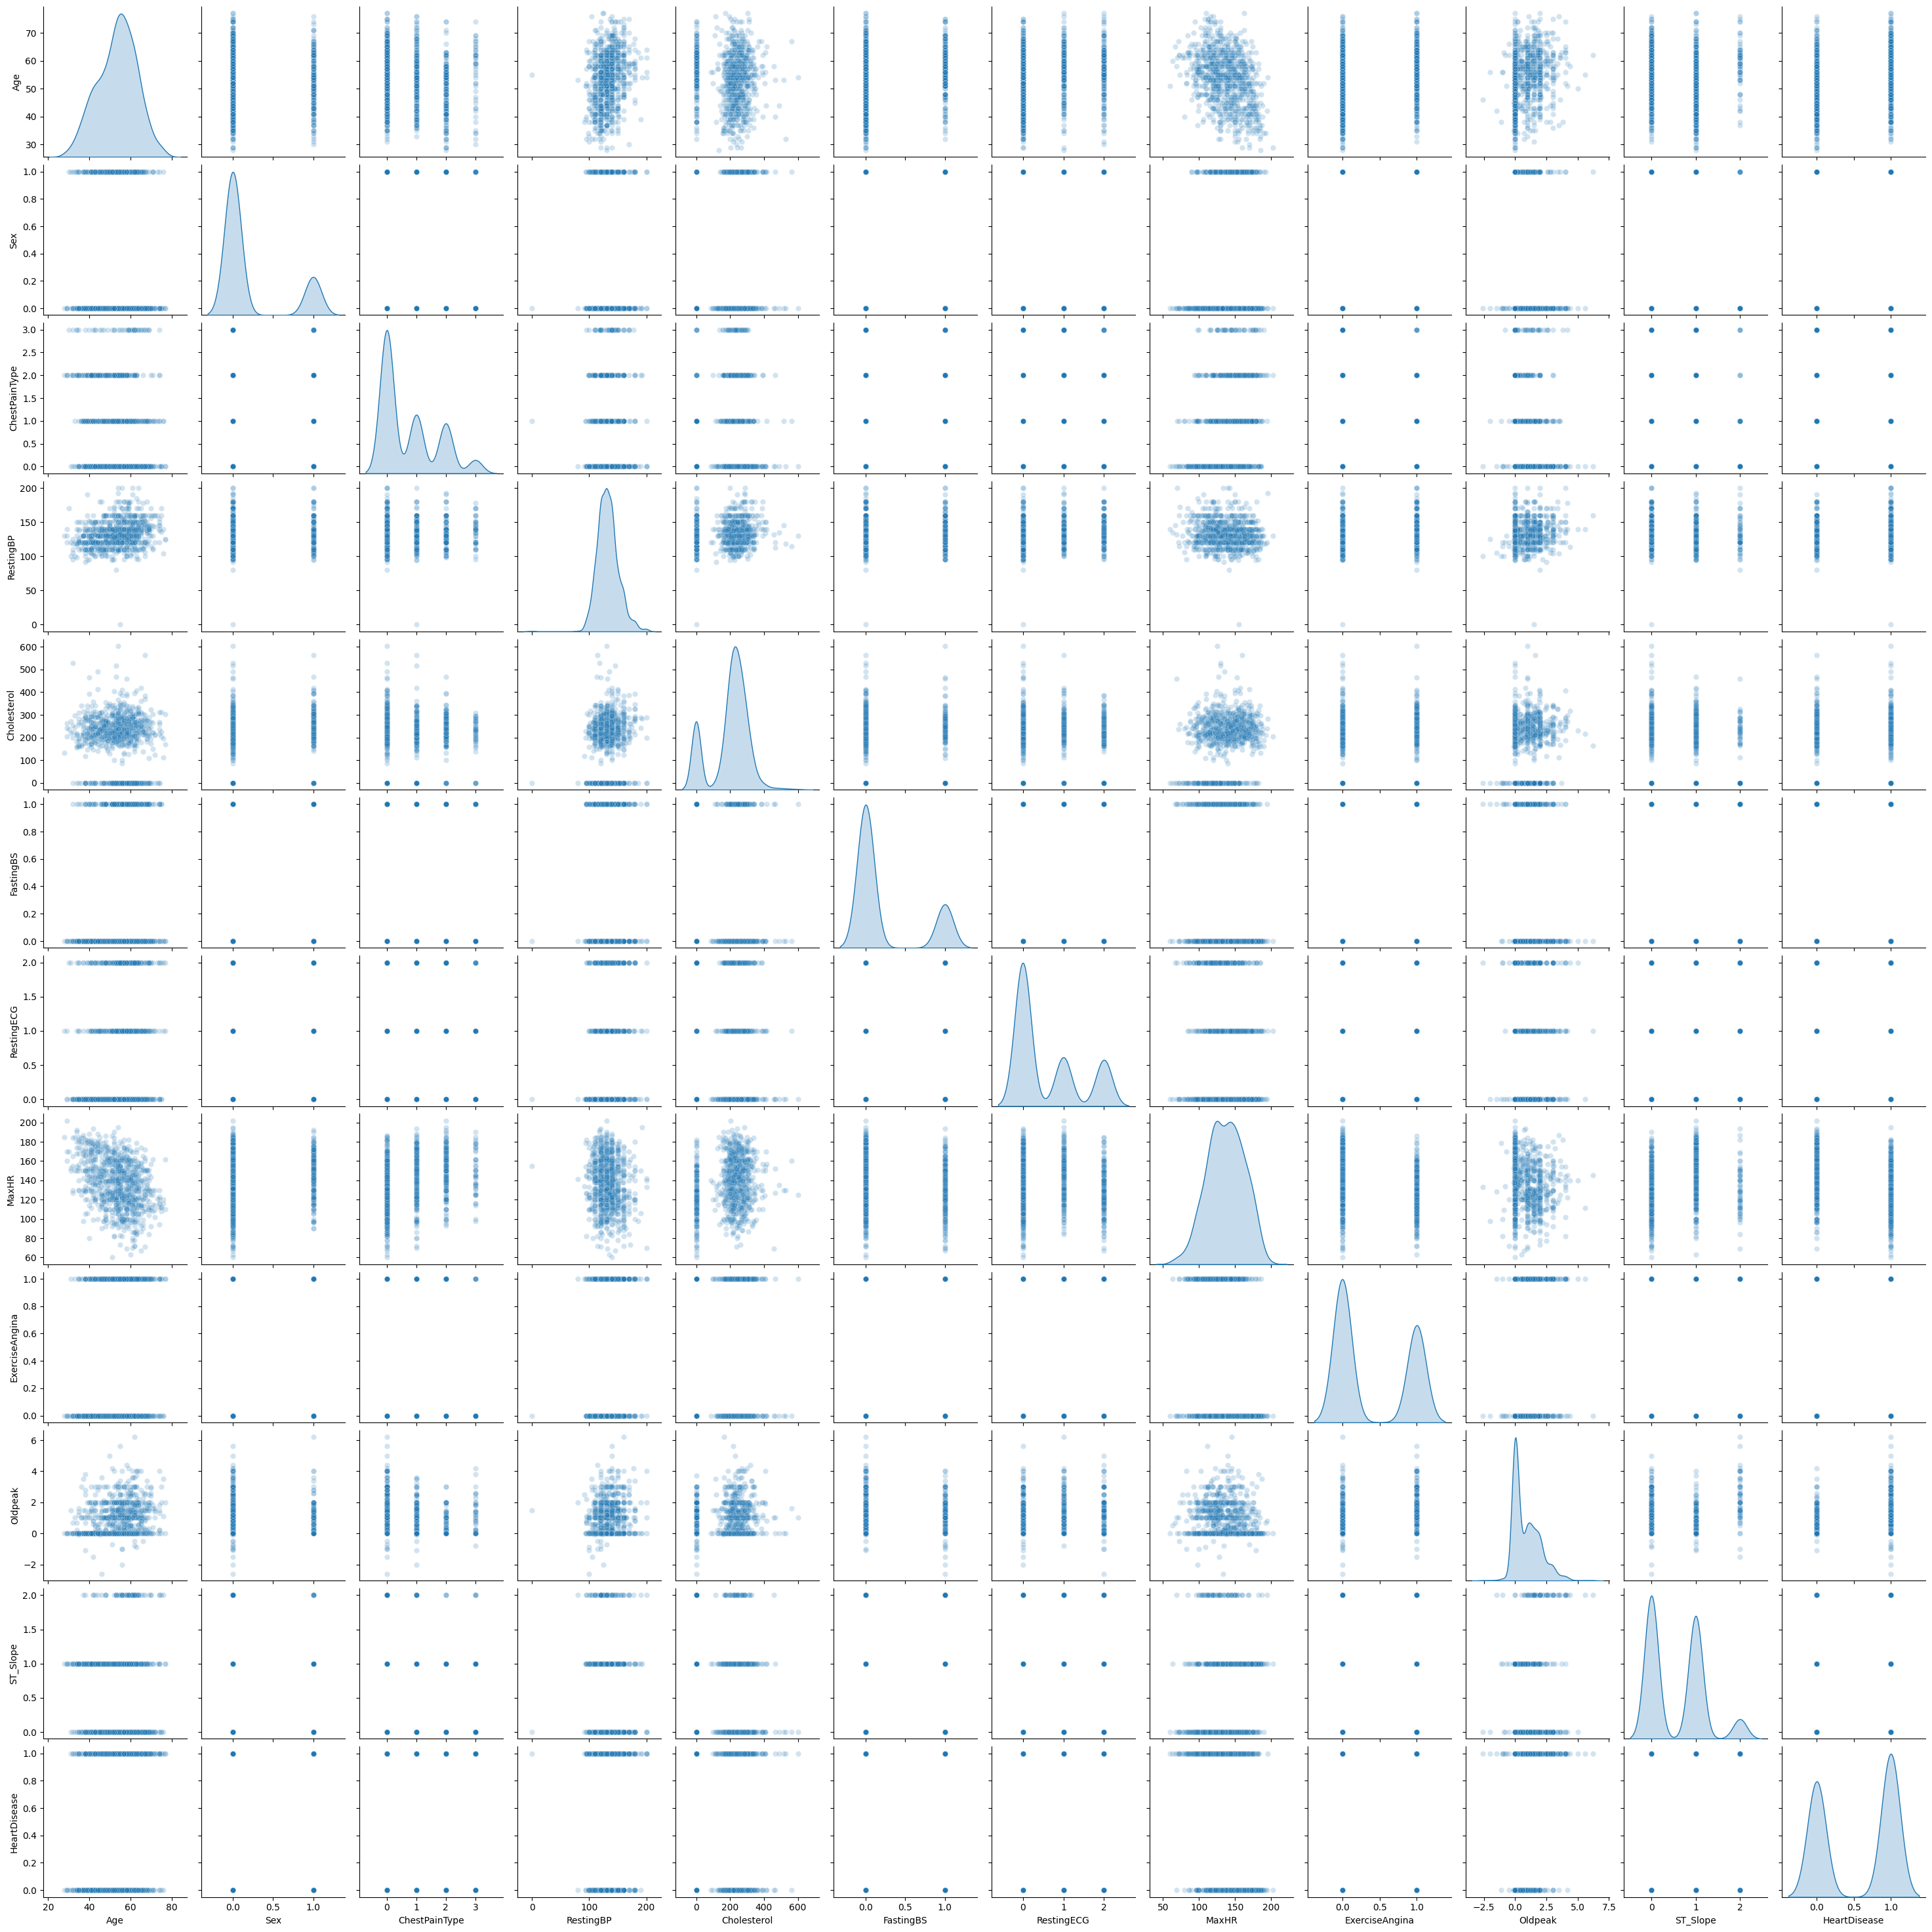

In [105]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.2})
plt.show()

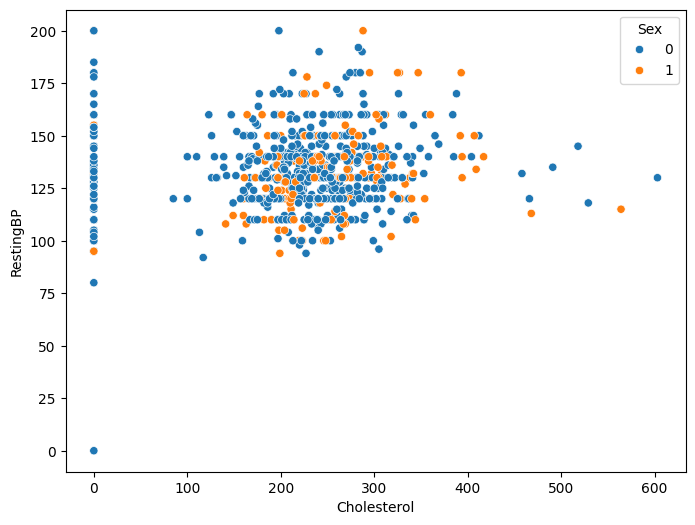

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Cholesterol', y='RestingBP', data=data, hue='Sex')
plt.show()

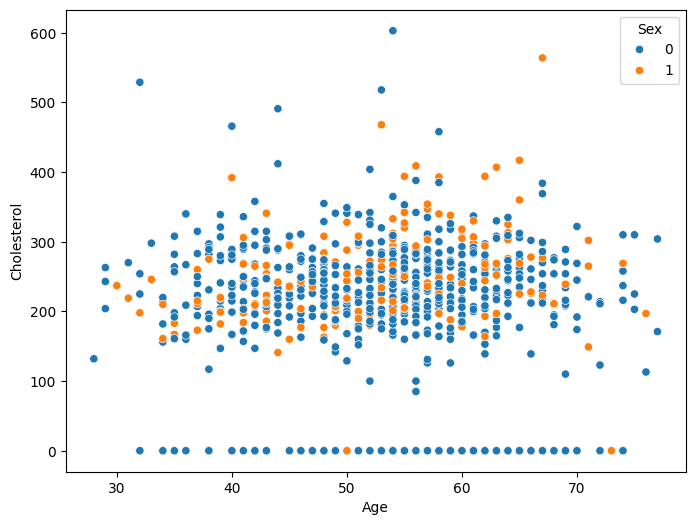

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Cholesterol', data=data, hue='Sex')
plt.show()

<Figure size 800x600 with 0 Axes>

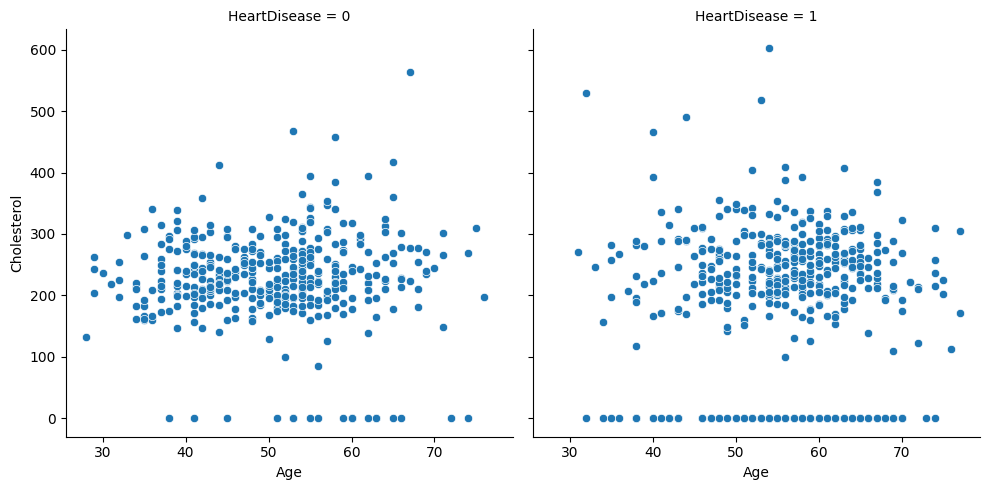

In [108]:
plt.figure(figsize=(8,6))
sns.relplot(x='Age', y='Cholesterol', data=data,kind='scatter', col='HeartDisease')
plt.show()

In [109]:
x = data.drop(columns=['HeartDisease'], axis=1)
y = data['HeartDisease']

In [110]:
x = np.array(x)
y = np.array(y)

In [111]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5], y[:5]

(tensor([[ 40.0000,   0.0000,   2.0000, 140.0000, 289.0000,   0.0000,   0.0000,
          172.0000,   0.0000,   0.0000,   1.0000],
         [ 49.0000,   1.0000,   1.0000, 160.0000, 180.0000,   0.0000,   0.0000,
          156.0000,   0.0000,   1.0000,   0.0000],
         [ 37.0000,   0.0000,   2.0000, 130.0000, 283.0000,   0.0000,   2.0000,
           98.0000,   0.0000,   0.0000,   1.0000],
         [ 48.0000,   1.0000,   0.0000, 138.0000, 214.0000,   0.0000,   0.0000,
          108.0000,   1.0000,   1.5000,   0.0000],
         [ 54.0000,   0.0000,   1.0000, 150.0000, 195.0000,   0.0000,   0.0000,
          122.0000,   0.0000,   0.0000,   1.0000]]),
 tensor([0., 1., 0., 1., 0.]))

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.1, random_state=42)

len(x_train), len(y_train), len(x_test), len(y_test)

(826, 826, 92, 92)

In [113]:
x_train[:3], x_test[:3], y_train[:3], y_test[:3]

(tensor([[ 56.0000,   0.0000,   1.0000, 137.0000, 208.0000,   1.0000,   2.0000,
          122.0000,   1.0000,   1.8000,   0.0000],
         [ 46.0000,   0.0000,   2.0000, 140.0000, 275.0000,   0.0000,   0.0000,
          165.0000,   1.0000,   0.0000,   1.0000],
         [ 39.0000,   0.0000,   2.0000, 120.0000, 200.0000,   0.0000,   0.0000,
          160.0000,   1.0000,   1.0000,   0.0000]]),
 tensor([[ 63.0000,   1.0000,   2.0000, 140.0000, 195.0000,   0.0000,   0.0000,
          179.0000,   0.0000,   0.0000,   1.0000],
         [ 53.0000,   0.0000,   1.0000, 145.0000, 518.0000,   0.0000,   0.0000,
          130.0000,   0.0000,   0.0000,   0.0000],
         [ 65.0000,   0.0000,   0.0000, 160.0000,   0.0000,   1.0000,   2.0000,
          122.0000,   0.0000,   1.2000,   0.0000]]),
 tensor([1., 0., 0.]),
 tensor([0., 1., 1.]))

In [114]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [115]:
x_train.shape

torch.Size([826, 11])

In [116]:
device = 'cude' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [117]:
class Heart_Modell (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features= 11, out_features=  64)
        self.layer_2 = nn.Linear(in_features = 64, out_features = 1)
#         self.Relu()
#         self.layer_3 = nn.Linear(in_feature = 64, out_feature = 2)
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_1 = Heart_Modell().to(device)
model_1

Heart_Modell(
  (layer_1): Linear(in_features=11, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [118]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
                        0.2658, -0.2212,  0.2621],
                      [ 0.0564,  0.2228,  0.0408,  0.1454, -0.0426,  0.2324,  0.0446, -0.1408,
                        0.0769, -0.1389, -0.0354],
                      [-0.1225,  0.2000, -0.2380, -0.1390, -0.0851, -0.1813,  0.0285, -0.2978,
                        0.2723, -0.2561,  0.2328],
                      [ 0.0502, -0.0979,  0.1863,  0.0470,  0.2436,  0.0330, -0.0951,  0.0810,
                       -0.0818,  0.1269,  0.2692],
                      [ 0.1743, -0.1318,  0.1741,  0.0539,  0.1531, -0.1838, -0.2985, -0.1165,
                       -0.2313,  0.2474,  0.0868],
                      [ 0.1249,  0.0954, -0.0052,  0.2360, -0.2142,  0.0190, -0.2058,  0.0930,
                       -0.1038,  0.0924, -0.0628],
                      [ 0.2501, -0.1787, -0.1798, -0.1798,  0.2712,  0.1005,  0.2901, -0.248

In [131]:
untrained_preds = model_1(x_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 92, Shape: torch.Size([92, 1])
Length of test samples: 92, Shape: torch.Size([92])

First 10 predictions:
tensor([[-2.5103],
        [-1.1421],
        [ 3.1507],
        [ 2.6996],
        [-2.4287],
        [ 1.2263],
        [ 0.9037],
        [-0.5732],
        [-0.3131],
        [ 1.5017]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 1., 1., 1., 0., 1., 1., 0., 1., 1.])


In [132]:
y_logits = model_1(x_test.to(device))[:5]
y_logits

tensor([[-2.5103],
        [-1.1421],
        [ 3.1507],
        [ 2.6996],
        [-2.4287]], grad_fn=<SliceBackward0>)

In [133]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.0751],
        [0.2419],
        [0.9589],
        [0.9370],
        [0.0810]], grad_fn=<SigmoidBackward0>)

In [134]:
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_1(x_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 1., 0.], grad_fn=<SqueezeBackward0>)

In [124]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
loss_f = torch.nn.BCELoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [126]:
loss_fun = torch.nn.BCELoss()
optimzer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [137]:
torch.manual_seed(42)
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(x_train).squeeze()

  loss = loss_fn(y_pred, y_train.squeeze())

  optimzer.zero_grad()

  loss.backward()

  optimzer.step()

  model_1.eval()

  with torch.inference_mode():

    test_pred = model_1(x_test).squeeze()

    loss_test = loss_fn(test_pred, y_test.squeeze())

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(loss_test.detach().numpy())
      print(f"num Epoch: {epoch} | MSE Train Loss: {loss} | MSE Test Loss: {loss_test} ")

num Epoch: 0 | MSE Train Loss: 0.3548823893070221 | MSE Test Loss: 0.3964340388774872 
num Epoch: 10 | MSE Train Loss: 0.3545892834663391 | MSE Test Loss: 0.3967800438404083 
num Epoch: 20 | MSE Train Loss: 0.35436904430389404 | MSE Test Loss: 0.3971083164215088 
num Epoch: 30 | MSE Train Loss: 0.3542046844959259 | MSE Test Loss: 0.39739280939102173 
num Epoch: 40 | MSE Train Loss: 0.35408255457878113 | MSE Test Loss: 0.3976640999317169 
num Epoch: 50 | MSE Train Loss: 0.35399213433265686 | MSE Test Loss: 0.39791765809059143 
num Epoch: 60 | MSE Train Loss: 0.35392487049102783 | MSE Test Loss: 0.39813441038131714 
num Epoch: 70 | MSE Train Loss: 0.3538746237754822 | MSE Test Loss: 0.3983270525932312 
num Epoch: 80 | MSE Train Loss: 0.3538365662097931 | MSE Test Loss: 0.3984885811805725 
num Epoch: 90 | MSE Train Loss: 0.3538071811199188 | MSE Test Loss: 0.39862820506095886 


In [128]:
# improve model
class Heart_Model_to (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features= 11, out_features=  64)
        self.layer_2 = nn.Linear(in_features= 64, out_features=  64)
        self.layer_3 = nn.Linear(in_features = 64, out_features = 1)
#         self.Relu()
#         self.layer_3 = nn.Linear(in_feature = 64, out_feature = 2)
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = Heart_Model_to().to(device)
model_2

Heart_Model_to(
  (layer_1): Linear(in_features=11, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
)

In [130]:
torch.manual_seed(42)

epochs = 100


for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(x_train).squeeze()

  loss = loss_fn(y_pred, y_train.squeeze())

  optimzer.zero_grad()

  loss.backward()

  optimzer.step()

  model_1.eval()

  with torch.inference_mode():

    test_pred = model_2(x_test).squeeze()

    loss_test = loss_fn(test_pred, y_test.squeeze())

    if epoch % 10 == 0:
      print(f"num Epoch: {epoch} | MSE Train Loss: {loss:.2f}% | MSE Test Loss: {loss_test} ")

num Epoch: 0 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 10 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 20 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 30 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 40 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 50 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 60 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 70 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 80 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 
num Epoch: 90 | MSE Train Loss: 4.55% | MSE Test Loss: 5.283674240112305 


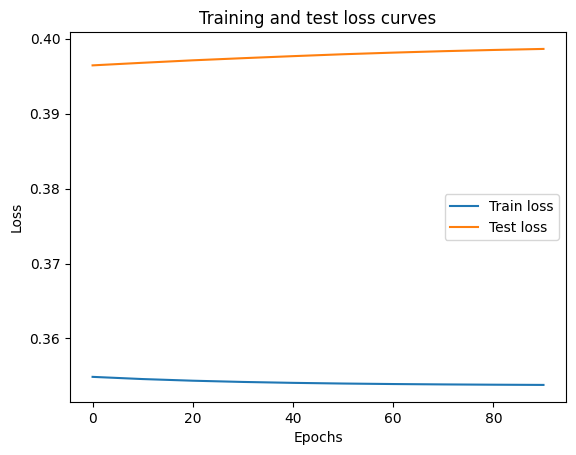

In [138]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();